In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df=pd.read_csv('titanic.csv')
pd.set_option('display.max_columns',None)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [7]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [8]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


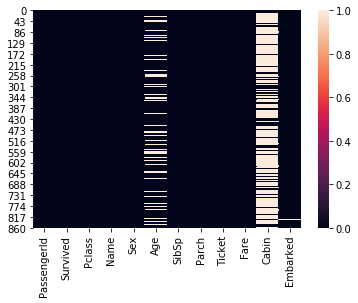

In [11]:
sns.heatmap(df.isnull())  

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
#Imputing the missing values and dropping columns which are irrelivant for model building

In [14]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked']).mode()[0]
df['Sex']=df['Sex'].replace(['male','female'],[0,1])

In [15]:
df=df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.000000,1,0,7.2500
1,1,1,1,38.000000,1,0,71.2833
2,1,3,1,26.000000,0,0,7.9250
3,1,1,1,35.000000,1,0,53.1000
4,0,3,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000
887,1,1,1,19.000000,0,0,30.0000
888,0,3,1,29.699118,1,2,23.4500
889,1,1,0,26.000000,0,0,30.0000


In [16]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

# EDA

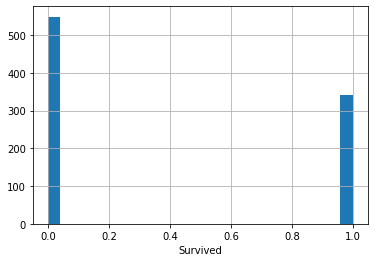

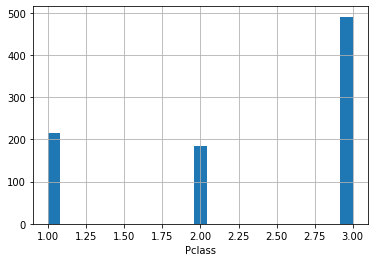

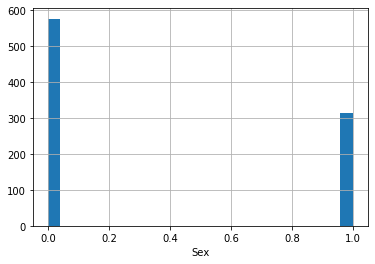

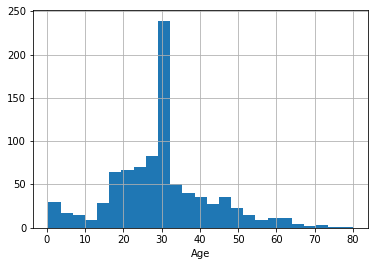

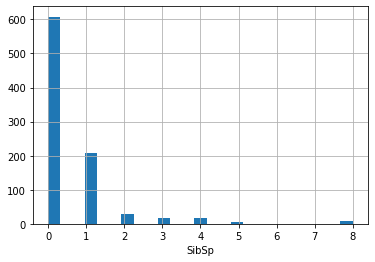

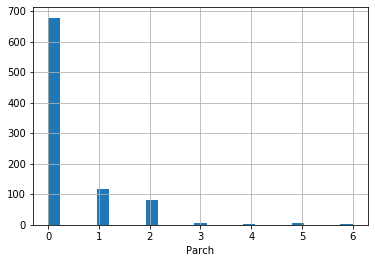

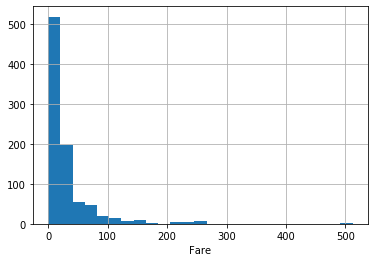

In [17]:
#checking for skewness
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.show()

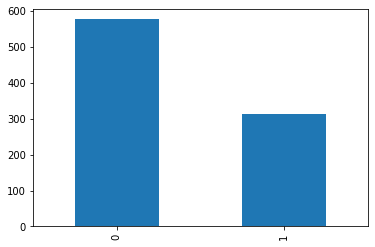

In [18]:
df['Sex'].value_counts().plot.bar()

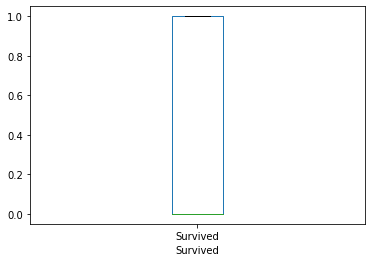

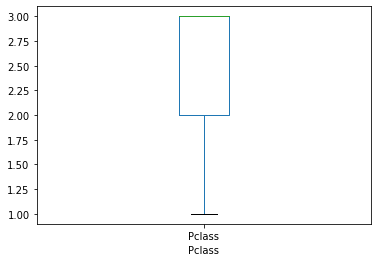

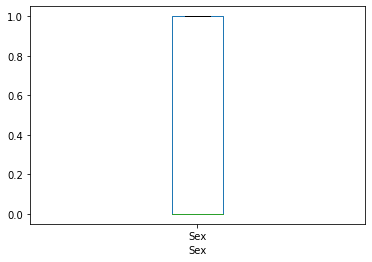

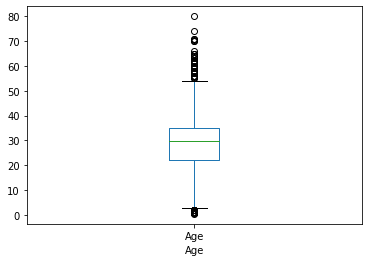

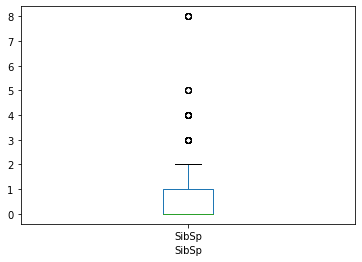

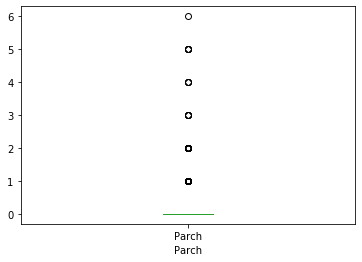

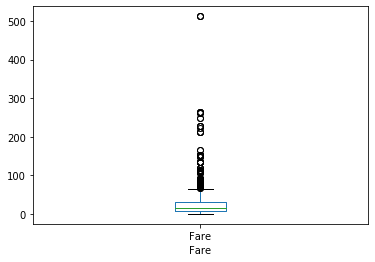

In [19]:
#checking for outliers

numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].plot.box()
    plt.xlabel(feature)
    plt.show()

In [20]:
df.groupby('Sex')['Survived'].value_counts().unstack()

Survived,0,1
Sex,,
0,468,109
1,81,233


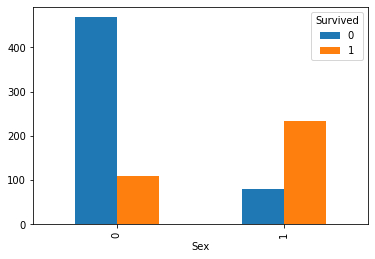

In [21]:
df.groupby('Sex')['Survived'].value_counts().unstack().plot.bar()

In [22]:
#from this graph we can say more % of female passengers have survived compared to male

# Data cleaning

In [ ]:
#data is skewed
#so we will use two step method to remove skewness as much as possible.
#1-->log transformations
#2-->StandarScaler

In [23]:
df.dtypes  
#we need to convert them into integer/float before applying the algorithms

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [24]:
#Removing skewness in the dataset by applying log transformations

df.skew() #we can see the data is +vely(right)skewed,hence we apply log transformation and then scale the data. 

Survived    0.478523
Pclass     -0.630548
Sex         0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

In [25]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])
    

In [26]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex         0.618921
Age         0.434488
SibSp       1.661245
Parch       1.675439
Fare        0.394928
dtype: float64

In [27]:
#Removing outliers now
from scipy.stats import zscore
z=abs(zscore(df))
z.shape

(891, 7)

In [28]:
df=df[(z<3).all(axis=1)]


In [29]:
df.shape  #891-844=47 rows deleted

(844, 7)

In [30]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0.000000,22.0,0.693147,0.0,2.110213
1,1,1,0.693147,38.0,0.693147,0.0,4.280593
2,1,3,0.693147,26.0,0.000000,0.0,2.188856
3,1,1,0.693147,35.0,0.693147,0.0,3.990834
4,0,3,0.000000,35.0,0.000000,0.0,2.202765


In [31]:
y=df[['Survived']]
X=df.drop(['Survived'],axis=1)

In [32]:
type(X),type(y)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [33]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(X)
x=pd.DataFrame(data=X_scaled,columns=X.columns)


In [34]:
x.skew()

Pclass   -0.631176
Sex       0.594266
Age       0.275362
SibSp     1.409871
Parch     1.604684
Fare      0.955913
dtype: float64

# Applying algorithm

In [35]:
y=y
x=x

In [36]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [38]:
knn=KNeighborsClassifier()
svc=SVC()
lr=LogisticRegression()
dt=DecisionTreeClassifier()
gnb=GaussianNB()
rfc=RandomForestClassifier()
xgb=XGBClassifier()

In [39]:
models=[]
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dt))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rfc))
models.append(('XGBClassifier',xgb))

In [40]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score

***************** KNeighborsClassifier *******************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score  - 0.8151658767772512


cross_val_score  - 0.8141088724646485


roc_auc_score  - 0.8021184851893514


Recall_score  - 0.7380952380952381


classification report
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       127
           1       0.78      0.74      0.76        84

    accuracy                           0.82       211
   macro avg       0.81      0.80      0.81       211
weighted avg       0.81      0.82      0.81       211



[[110  17]
 [ 22  62]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



***************** SVC *******************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  

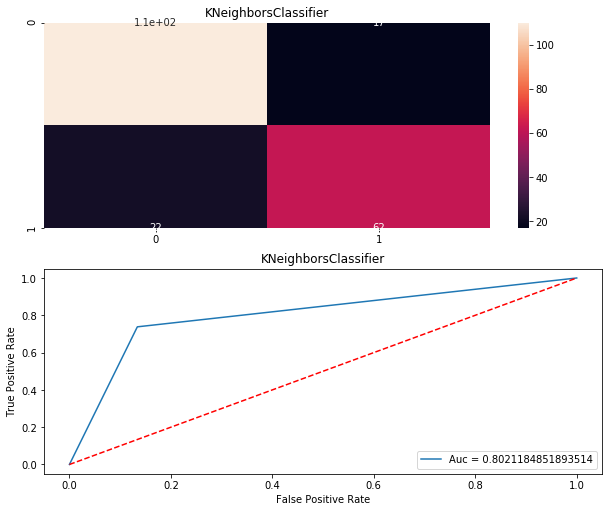

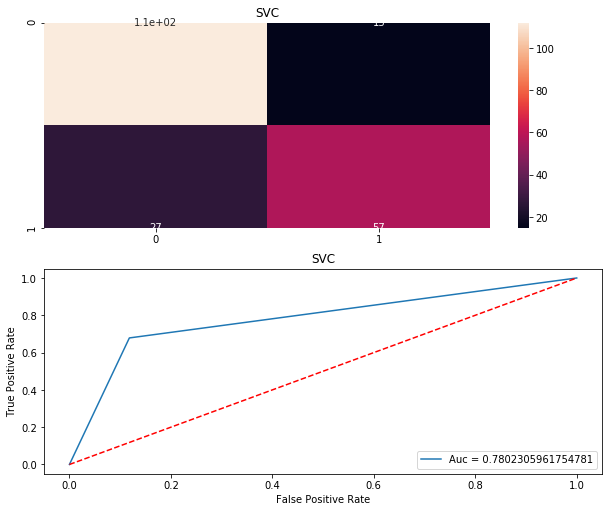

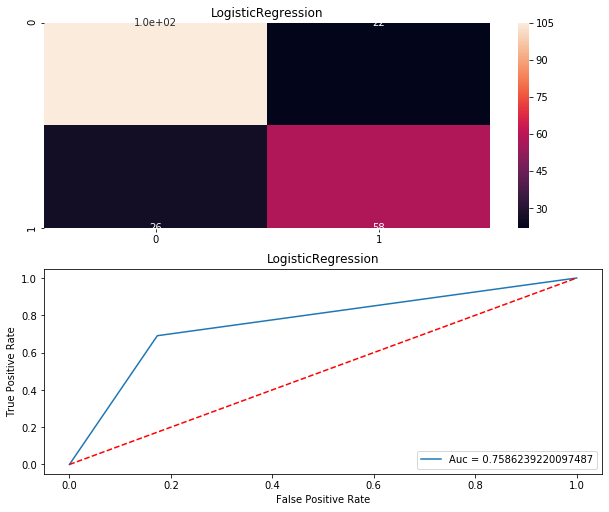

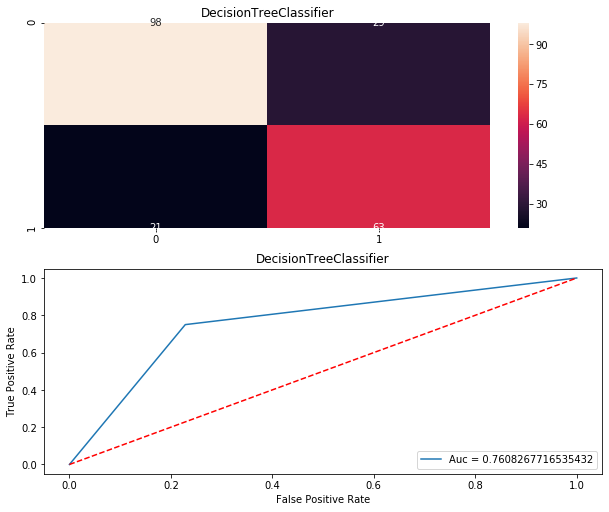

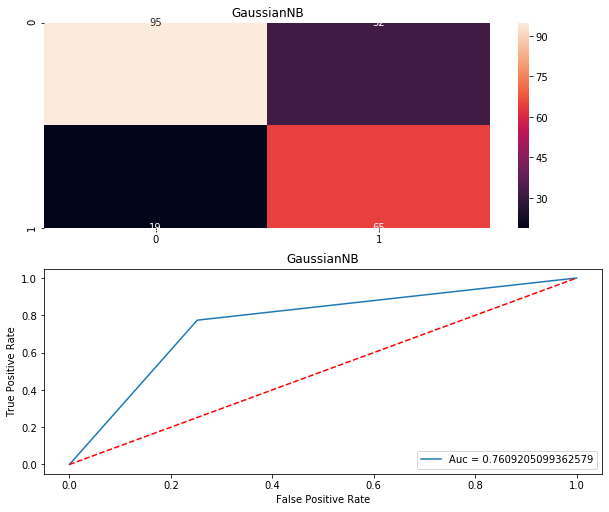

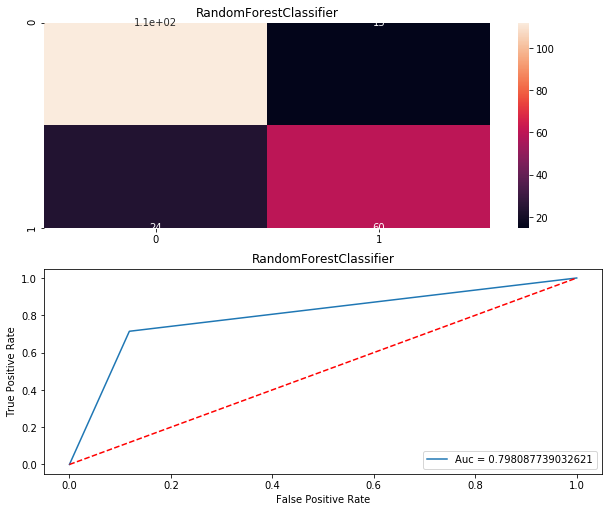

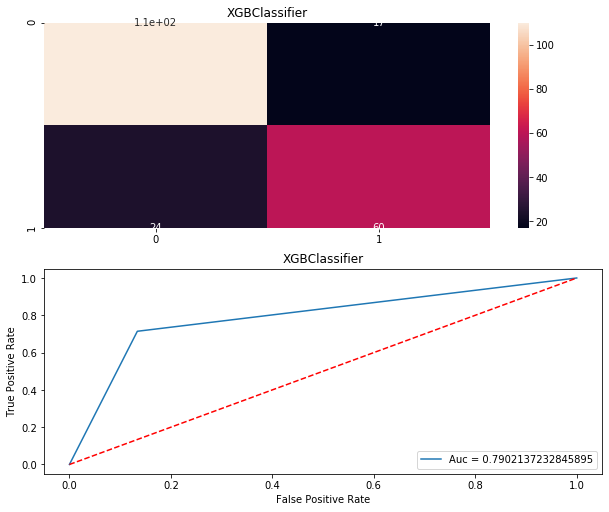

In [41]:
Model=[]
score=[]
cv=[]
rocscore=[]
recall=[]
for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score  -',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
    fpr,tpr,threshold=roc_curve(y_test,pre)
    roc_auc=auc(fpr,tpr)
    print('roc_auc_score  -',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    
    re=recall_score(y_test,pre)
    print('Recall_score  -',re)
    recall.append(re*100)
    print('\n')
    
    print('classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr,tpr,label='Auc = ' +str(roc_auc))
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')
    
    
    

In [42]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Recall_score':recall,'Cross_val_score':cv,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Recall_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,81.516588,73.809524,81.410887,80.211849
1,SVC,80.094787,67.857143,82.242921,78.023060
2,LogisticRegression,77.251185,69.047619,77.972276,75.862392
3,DecisionTreeClassifier,76.303318,75.000000,78.101195,76.082677
4,GaussianNB,75.829384,77.380952,76.323816,76.092051
5,RandomForestClassifier,81.516588,71.428571,80.349263,79.808774
6,XGBClassifier,80.568720,71.428571,79.152982,79.021372


# Finding the best random_state

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,recall_score
from sklearn.linear_model import LogisticRegression
def maxaccuracy_score(model,x,y):
    max_accuracy=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,stratify=y)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=accuracy_score(y_test,pred)
        roc_score=roc_auc_score(y_test,pred)
        if score>max_accuracy:
            max_accuracy=score
            final_r_state=r_state
    print('max_accuracy_score is at random_state  ',final_r_state,'  which is  ',max_accuracy,'and roc_auc_score=',roc_score)
    return final_r_state

In [44]:
maxaccuracy_score(knn,x,y)

max_accuracy_score is at random_state   43   which is   0.8530805687203792 and roc_auc_score= 0.8121016122984628


43

In [45]:
maxaccuracy_score(svc,x,y)

max_accuracy_score is at random_state   82   which is   0.8720379146919431 and roc_auc_score= 0.8160386201724784


82

In [46]:
maxaccuracy_score(lr,x,y)

max_accuracy_score is at random_state   84   which is   0.8483412322274881 and roc_auc_score= 0.7646700412448444


84

In [47]:
maxaccuracy_score(dt,x,y)

max_accuracy_score is at random_state   92   which is   0.8151658767772512 and roc_auc_score= 0.7665916760404949


92

In [48]:
maxaccuracy_score(gnb,x,y)

max_accuracy_score is at random_state   76   which is   0.8104265402843602 and roc_auc_score= 0.7847300337457818


76

In [49]:
maxaccuracy_score(rfc,x,y)

max_accuracy_score is at random_state   62   which is   0.8625592417061612 and roc_auc_score= 0.8177727784026998


62

In [50]:
maxaccuracy_score(xgb,x,y)

max_accuracy_score is at random_state   47   which is   0.8436018957345972 and roc_auc_score= 0.7862767154105738


47

In [51]:
#hence RandomForestClassifier is the best performing Algorithm for the taken dataset.

# GridsearchCV

In [60]:
from sklearn.model_selection import GridSearchCV
parameters=[{'n_estimators':[50,100,150,200],'criterion':['gini','entropy'],'max_depth':[10,50,100,200],}]
            
grid_search=GridSearchCV(rfc,parameters,scoring='accuracy',n_jobs=-1,cv=10)
grid_search=grid_search.fit(x_train,y_train)

In [61]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=62,stratify=y)
rfc=RandomForestClassifier(criterion='entropy',max_depth=10,n_estimators=100)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
score=accuracy_score(y_test,pred)
print('Accuracy_score=  ',score)

Accuracy_score=   0.8862559241706162


# saving the model

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=62,stratify=y)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
score=accuracy_score(y_test,pred)
print('Accuracy_score=  ',score)

Accuracy_score=   0.8862559241706162


In [65]:
from sklearn.externals import joblib
joblib.dump(svc,'titanic_svc_classification.csv')

['titanic_svc_classification.csv']

In [66]:
model=joblib.load('titanic_svc_classification.csv')

In [67]:
model.predict(x_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0], dtype=int64)